Hybrid GA + TS Version 1


=== DRONE ROUTES (Hybrid GA + Tabu Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: [0, 7, 6, 31, 30, 32, 29, 28, 27, 33, 5, 0]
    Total distance: 114.30 km
    Estimated flight time: 63.50 min 
  Drone 2 Route: [0, 4, 0]
    Total distance: 109.19 km
    Estimated flight time: 60.66 min 

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: [1, 24, 25, 26, 64, 66, 65, 50, 63, 22, 23, 21, 62, 15, 18, 74, 53, 54, 51, 55, 56, 75, 1]
    Total distance: 288.48 km
    Estimated flight time: 160.27 min 
  Drone 2 Route: [1, 52, 13, 12, 10, 58, 57, 9, 20, 61, 60, 19, 17, 16, 14, 8, 59, 11, 1]
    Total distance: 133.83 km
    Estimated flight time: 74.35 min 

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: [2, 34, 3, 39, 40, 41, 2]
    Total distance: 117.41 km
    Estimated flight time: 65.23 min 
  Drone 2 Route: [2, 67, 68, 72, 73, 71, 48, 38, 43, 42, 47, 44, 46, 

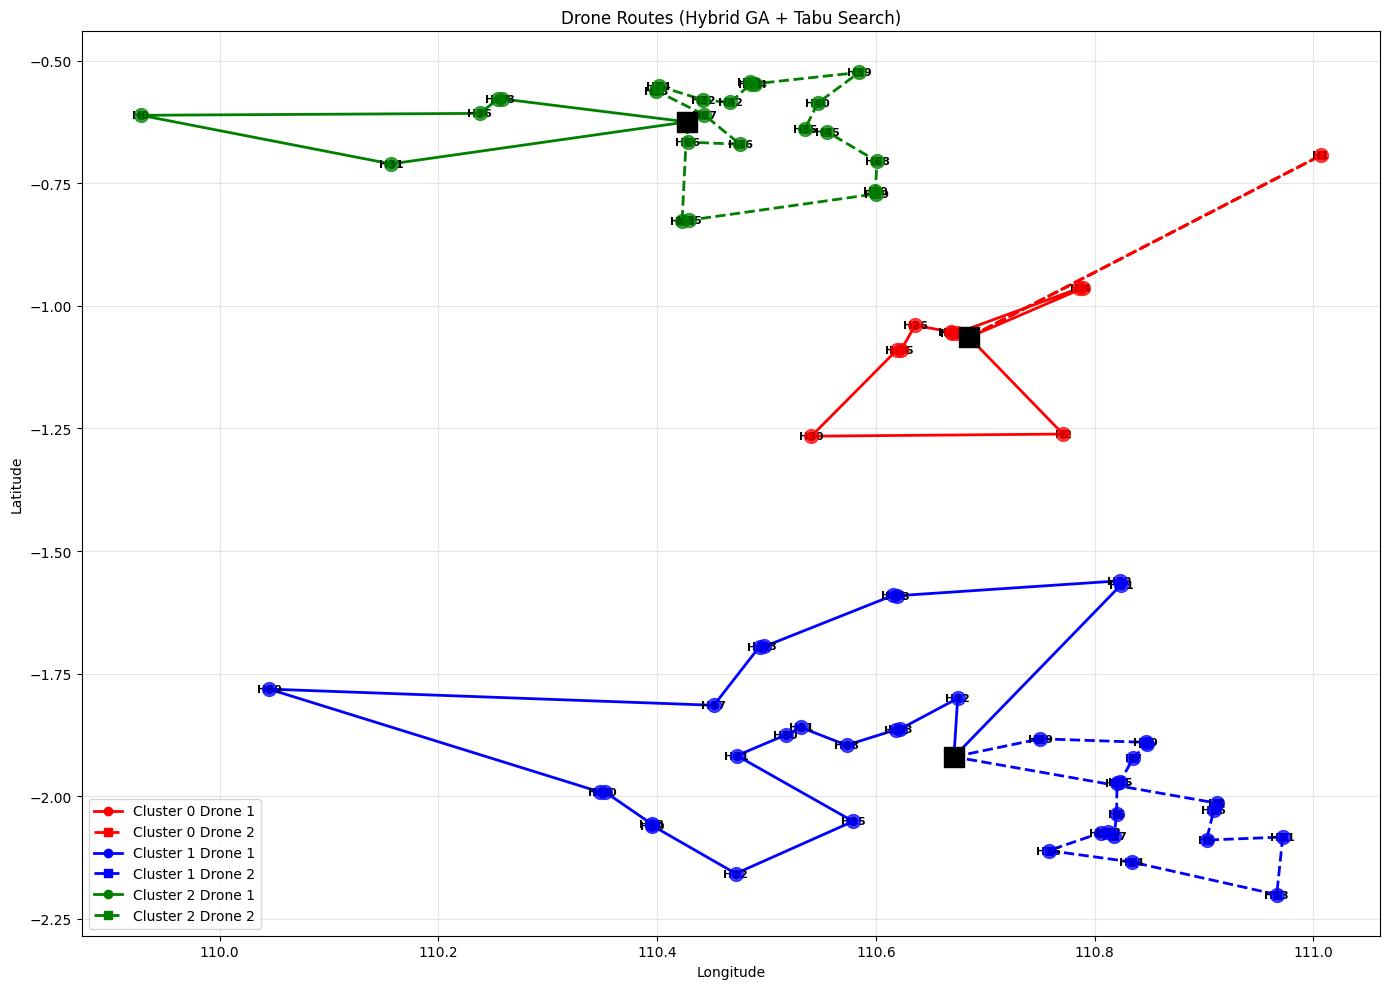

In [2]:
from ga_ts import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}

# Buat objek hybrid
routing_hybrid = ClusterBasedDroneRoutingHybridTabu(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

# Jalankan optimasi hybrid
routes = routing_hybrid.optimize_all_clusters()

# Tampilkan hasil
routing_hybrid.print_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes(routes)


Hybrid GA + TS Version 1 Optimized


=== DRONE ROUTES (Optimized Hybrid GA + Tabu Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: [0, 31, 30, 32, 29, 28, 27, 33, 5, 7, 6, 0]
    Total distance: 108.70 km | Time: 60.39 min 
  Drone 2 Route: [0, 4, 0]
    Total distance: 109.19 km | Time: 60.66 min 

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: [1, 18, 15, 62, 21, 23, 22, 63, 50, 65, 66, 64, 26, 25, 24, 75, 56, 55, 54, 53, 74, 51, 1]
    Total distance: 282.16 km | Time: 156.76 min 
  Drone 2 Route: [1, 57, 58, 9, 60, 61, 20, 19, 17, 16, 14, 8, 59, 11, 10, 13, 12, 52, 1]
    Total distance: 131.80 km | Time: 73.22 min 

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: [2, 34, 3, 39, 40, 41, 2]
    Total distance: 117.41 km | Time: 65.23 min 
  Drone 2 Route: [2, 70, 36, 37, 35, 45, 46, 44, 47, 42, 43, 38, 48, 71, 73, 72, 68, 67, 49, 69, 2]
    Total distance: 117.02 km | Time: 65.01 min 


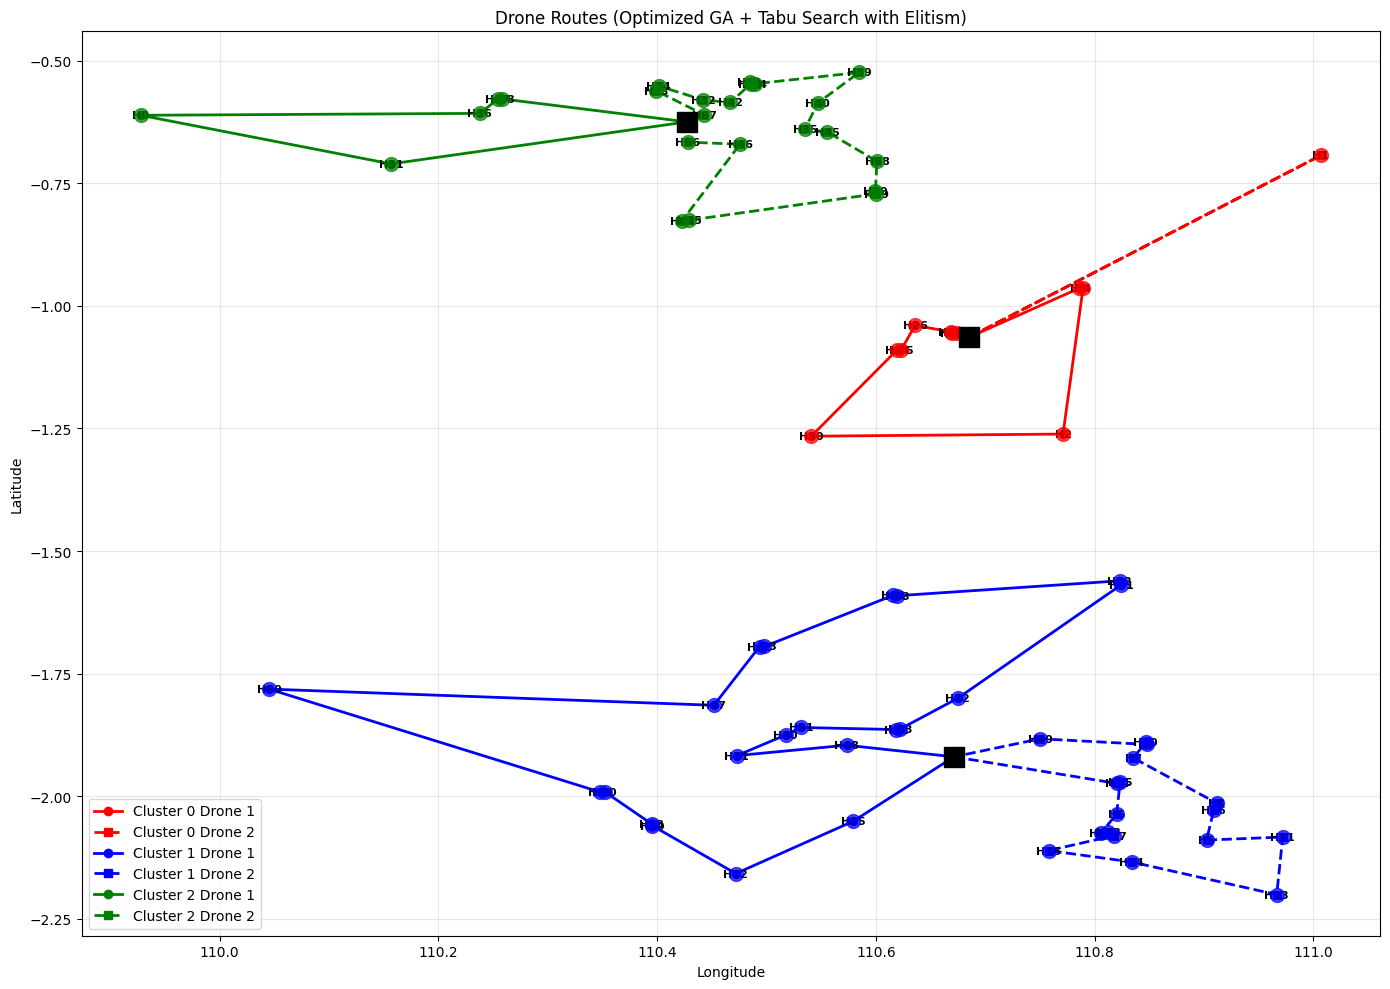

In [1]:
from ga_ts import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}

# Buat objek hybrid
routing_hybrid = ClusterBasedDroneRoutingHybridTabuOptimized(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

# Jalankan optimasi hybrid
routes = routing_hybrid.optimize_all_clusters()

# Tampilkan hasil
routing_hybrid.print_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes(routes)


Hybrid GA+TS Parameter Tuning Manual Search

In [1]:
import itertools
import time
from ga_ts import *

def parameter_tuning_test():
    # === Parameter grid ===
    param_grid = {
        'population_size': [20, 30, 40],
        'generations': [100, 150],
        'mutation_rate': [0.1, 0.18, 0.25],
        'tabu_tenure': [7, 10, 15],
        'tabu_budget': [50, 100]
    }

    road_points = {
        0: (-1.064124, 110.685258),
        1: (-1.919500, 110.671412),
        2: (-0.625036, 110.427354)
    }

    best_config = None
    best_total_dist = float('inf')
    results = []

    print("=== 🚀 MULAI TUNING PARAMETER GA + TABU SEARCH ===\n")

    combo_list = list(itertools.product(
        param_grid['population_size'],
        param_grid['generations'],
        param_grid['mutation_rate'],
        param_grid['tabu_tenure'],
        param_grid['tabu_budget']
    ))

    total_runs = len(combo_list)
    start_all = time.time()

    for idx, (pop, gen, mut, tt, tb) in enumerate(combo_list, start=1):
        print(f"\n▶️ [Run {idx}/{total_runs}] pop={pop}, gen={gen}, mut={mut:.2f}, tabu_tenure={tt}, tabu_budget={tb}")

        # Inisialisasi solver dengan parameter tabu yang diuji
        routing = ClusterBasedDroneRoutingHybridTabuOptimized(
            csv_file="ketapang-12-08-24_merged_clustered_3.csv",
            road_points=road_points,
            n_drones={0: 2, 1: 2, 2: 2},
            tabu_tenure=tt,
            tabu_budget=tb
        )

        start = time.time()
        routes = routing.optimize_all_clusters(
            population_size=pop,
            generations=gen,
            mutation_rate=mut
        )
        duration = time.time() - start

        # Hitung total jarak & waktu
        total_dist = 0
        total_time = 0
        max_time = 0
        num_routes = 0
        for routes_cluster in routes.values():
            for route in routes_cluster:
                if len(route) <= 1:
                    continue
                d = routing._route_distance(route)
                t = d * 1000 / routing.drone_speed / 60
                total_dist += d
                total_time += t
                max_time = max(max_time, t)
                num_routes += 1

        avg_time = total_time / num_routes if num_routes > 0 else 0

        # Simpan hasil
        results.append((pop, gen, mut, tt, tb, total_dist, avg_time, max_time, duration))
        print(f"  → Total distance: {total_dist:.2f} km | Avg time: {avg_time:.1f} min | Max time: {max_time:.1f} min | Runtime: {duration:.1f} s")

        # Update best config
        if total_dist < best_total_dist:
            best_total_dist = total_dist
            best_config = (pop, gen, mut, tt, tb, total_dist, avg_time, max_time, duration)

    total_time_all = time.time() - start_all

    print("\n\n=== ✅ HASIL AKHIR TUNING PARAMETER ===")
    print(f"Total kombinasi diuji: {total_runs} | Waktu total: {total_time_all/60:.1f} menit\n")

    # Urutkan hasil berdasarkan total jarak
    results.sort(key=lambda x: x[5])

    print("📊 5 Kombinasi Terbaik Berdasarkan Total Distance:")
    print("-" * 75)
    print(f"{'Pop':<6} {'Gen':<6} {'Mut':<6} {'TT':<4} {'TB':<4} {'Dist(km)':<12} {'AvgT(min)':<12} {'MaxT(min)':<12} {'Time(s)':<8}")
    print("-" * 75)
    for r in results[:5]:
        print(f"{r[0]:<6} {r[1]:<6} {r[2]:<6.2f} {r[3]:<4} {r[4]:<4} {r[5]:<12.2f} {r[6]:<12.1f} {r[7]:<12.1f} {r[8]:<8.1f}")
    print("-" * 75)

    print(f"\n🏆 Best configuration overall:")
    print(f"   Population: {best_config[0]}, Generations: {best_config[1]}, Mutation: {best_config[2]:.2f},")
    print(f"   Tabu Tenure: {best_config[3]}, Tabu Budget: {best_config[4]}")
    print(f"   → Total Distance: {best_config[5]:.2f} km | Avg Time: {best_config[6]:.1f} min | Max Time: {best_config[7]:.1f} min | Runtime: {best_config[8]:.1f} s")

# Jalankan tuning
parameter_tuning_test()

=== 🚀 MULAI TUNING PARAMETER GA + TABU SEARCH ===


▶️ [Run 1/108] pop=20, gen=100, mut=0.10, tabu_tenure=7, tabu_budget=50
  → Total distance: 875.42 km | Avg time: 81.1 min | Max time: 157.5 min | Runtime: 59.4 s

▶️ [Run 2/108] pop=20, gen=100, mut=0.10, tabu_tenure=7, tabu_budget=100
  → Total distance: 864.59 km | Avg time: 80.1 min | Max time: 156.7 min | Runtime: 114.5 s

▶️ [Run 3/108] pop=20, gen=100, mut=0.10, tabu_tenure=10, tabu_budget=50
  → Total distance: 876.15 km | Avg time: 81.1 min | Max time: 156.9 min | Runtime: 54.3 s

▶️ [Run 4/108] pop=20, gen=100, mut=0.10, tabu_tenure=10, tabu_budget=100
  → Total distance: 858.42 km | Avg time: 79.5 min | Max time: 153.2 min | Runtime: 111.6 s

▶️ [Run 5/108] pop=20, gen=100, mut=0.10, tabu_tenure=15, tabu_budget=50
  → Total distance: 864.76 km | Avg time: 80.1 min | Max time: 156.8 min | Runtime: 53.0 s

▶️ [Run 6/108] pop=20, gen=100, mut=0.10, tabu_tenure=15, tabu_budget=100
  → Total distance: 859.62 km | Avg time: 79.6 


=== DRONE ROUTES (Optimized Hybrid GA + Tabu Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: [0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0]
    Total distance: 108.70 km | Time: 60.39 min 
  Drone 2 Route: [0, 4, 0]
    Total distance: 109.19 km | Time: 60.66 min 

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: [1, 55, 56, 75, 24, 25, 26, 64, 66, 65, 50, 63, 22, 23, 21, 62, 15, 18, 74, 53, 54, 51, 1]
    Total distance: 276.87 km | Time: 153.82 min 
  Drone 2 Route: [1, 52, 13, 12, 10, 11, 59, 8, 14, 16, 17, 19, 60, 61, 20, 9, 57, 58, 1]
    Total distance: 130.68 km | Time: 72.60 min 

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: [2, 34, 3, 39, 40, 41, 2]
    Total distance: 117.41 km | Time: 65.23 min 
  Drone 2 Route: [2, 69, 70, 35, 36, 37, 45, 47, 46, 44, 42, 43, 38, 48, 71, 73, 72, 68, 67, 49, 2]
    Total distance: 124.71 km | Time: 69.28 min 


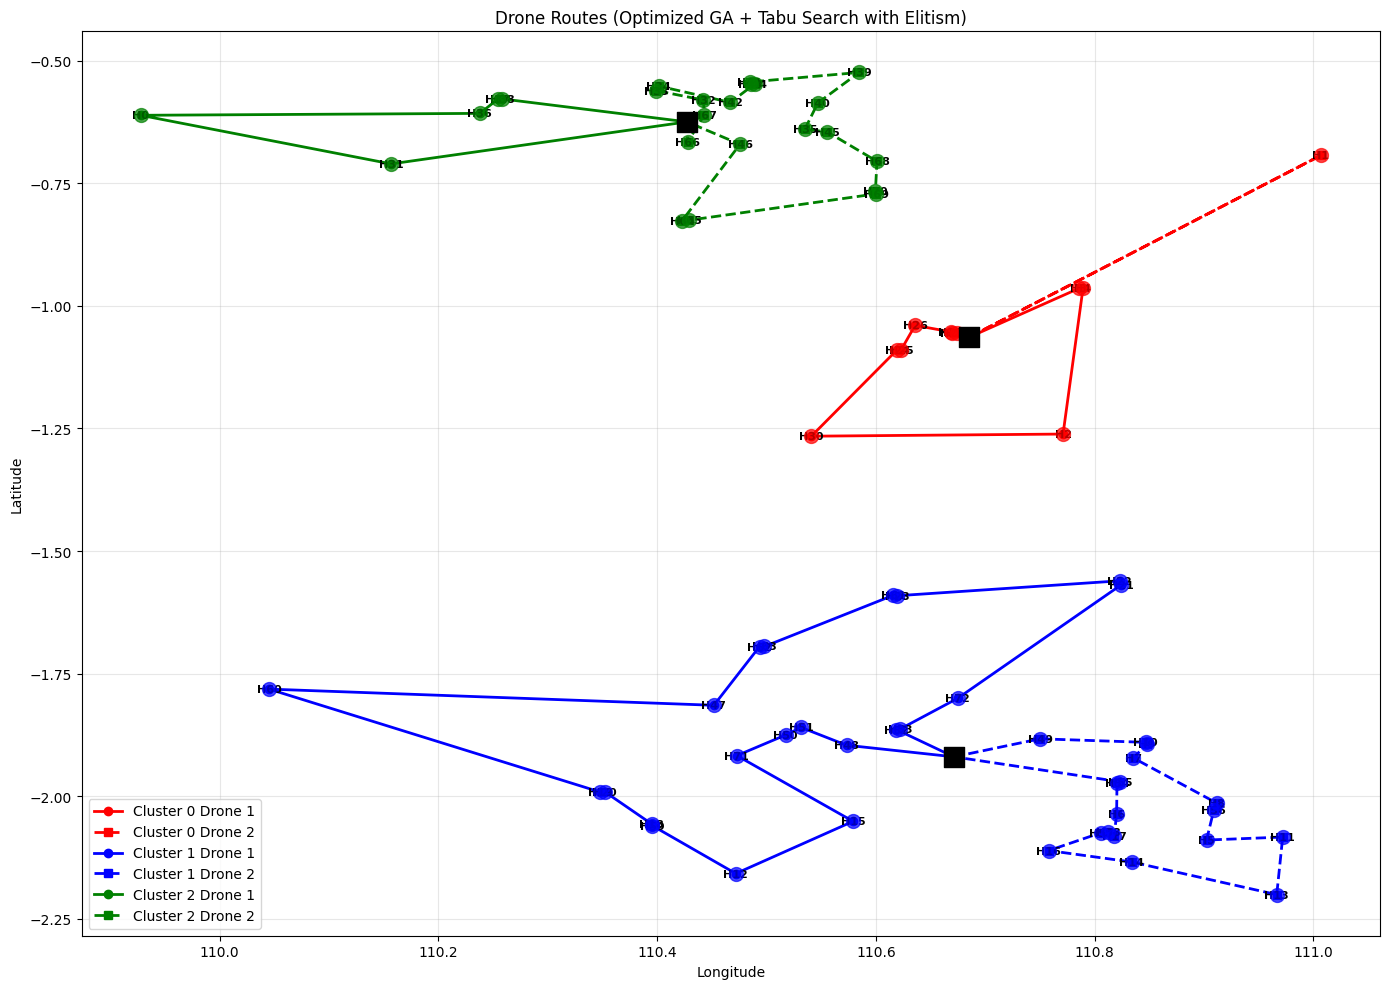

In [6]:
routing_hybrid = ClusterBasedDroneRoutingHybridTabuOptimized(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2},
    tabu_tenure=15,
    tabu_budget=50
)

routes = routing_hybrid.optimize_all_clusters(
    population_size=20,
    generations=150,
    mutation_rate=0.25
)

routing_hybrid.print_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes(routes)


In [1]:
from ga_ts import *
road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}
routing_hybrid = ClusterBasedDroneRoutingHybridTabuOptimized(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2},
    tabu_tenure=15,
    tabu_budget=50
)

routes = routing_hybrid.optimize_all_clusters(
    population_size=20,
    generations=150,
    mutation_rate=0.25
)

routing_hybrid.print_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes(routes)



=== DRONE ROUTES (Optimized Hybrid GA + Tabu Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: [0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0]
    Total distance: 108.70 km | Time: 60.39 min 
  Drone 2 Route: [0, 4, 0]
    Total distance: 109.19 km | Time: 60.66 min 

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: [1, 56, 55, 51, 53, 54, 50, 74, 18, 15, 62, 21, 23, 22, 63, 65, 66, 26, 64, 25, 24, 75, 1]
    Total distance: 283.32 km | Time: 157.40 min 
  Drone 2 Route: [1, 9, 20, 61, 60, 19, 17, 16, 14, 8, 59, 11, 57, 58, 10, 12, 13, 52, 1]
    Total distance: 130.28 km | Time: 72.38 min 

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: [2, 34, 3, 39, 40, 41, 2]
    Total distance: 117.41 km | Time: 65.23 min 
  Drone 2 Route: [2, 69, 49, 67, 68, 72, 73, 71, 48, 38, 43, 42, 46, 47, 44, 45, 35, 37, 36, 70, 2]
    Total distance: 117.84 km | Time: 65.47 min 
✅ Var

Hybrid GA+TS Parameter Tuning Bayesien

In [3]:
import optuna
import warnings
warnings.filterwarnings("ignore")

road_points = {
    0: (-1.064124, 110.685258),
    1: (-1.919500, 110.671412),
    2: (-0.625036, 110.427354)
}

def objective(trial):
    # Parameter GA + Tabu yang ingin dicari
    pop = trial.suggest_int("population_size", 20, 40)
    gen = trial.suggest_int("generations", 80, 150)
    mut = trial.suggest_float("mutation_rate", 0.1, 0.25)
    tt = trial.suggest_int("tabu_tenure", 5, 15)
    tb = trial.suggest_int("tabu_budget", 50, 120)

    routing = ClusterBasedDroneRoutingHybridTabuOptimized(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2},
        tabu_tenure=tt,
        tabu_budget=tb
    )

    routes = routing.optimize_all_clusters(
        population_size=pop,
        generations=gen,
        mutation_rate=mut
    )

    total_distance = 0
    for cid, routes_list in routes.items():
        for route in routes_list:
            for i in range(len(route)-1):
                total_distance += routing.dist_matrix[route[i]][route[i+1]]

    print(f"Trial {trial.number}: pop={pop}, gen={gen}, mut={mut:.2f}, TT={tt}, TB={tb} → Dist={total_distance:.2f}")
    return total_distance

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("\n=== 🏆 Best Configuration ===")
print(f"Best params: {study.best_params}")
print(f"Best total distance: {study.best_value:.2f} km")


[I 2025-10-09 22:30:48,959] A new study created in memory with name: no-name-09cbcebb-c5a8-4319-a33e-bbd49034021c


[I 2025-10-09 22:32:44,992] Trial 0 finished with value: 866.2743232448647 and parameters: {'population_size': 36, 'generations': 95, 'mutation_rate': 0.19126819263514577, 'tabu_tenure': 6, 'tabu_budget': 58}. Best is trial 0 with value: 866.2743232448647.


Trial 0: pop=36, gen=95, mut=0.19, TT=6, TB=58 → Dist=866.27


[I 2025-10-09 22:35:09,819] Trial 1 finished with value: 869.9900065850064 and parameters: {'population_size': 27, 'generations': 127, 'mutation_rate': 0.24293489260736517, 'tabu_tenure': 6, 'tabu_budget': 78}. Best is trial 0 with value: 866.2743232448647.


Trial 1: pop=27, gen=127, mut=0.24, TT=6, TB=78 → Dist=869.99


[I 2025-10-09 22:37:48,735] Trial 2 finished with value: 867.0410013900962 and parameters: {'population_size': 27, 'generations': 109, 'mutation_rate': 0.20756988687324068, 'tabu_tenure': 14, 'tabu_budget': 107}. Best is trial 0 with value: 866.2743232448647.


Trial 2: pop=27, gen=109, mut=0.21, TT=14, TB=107 → Dist=867.04


[I 2025-10-09 22:40:24,877] Trial 3 finished with value: 862.1598528253961 and parameters: {'population_size': 31, 'generations': 122, 'mutation_rate': 0.13630687517458634, 'tabu_tenure': 11, 'tabu_budget': 73}. Best is trial 3 with value: 862.1598528253961.


Trial 3: pop=31, gen=122, mut=0.14, TT=11, TB=73 → Dist=862.16


[I 2025-10-09 22:42:08,515] Trial 4 finished with value: 878.1039723285792 and parameters: {'population_size': 24, 'generations': 125, 'mutation_rate': 0.12964264155532437, 'tabu_tenure': 13, 'tabu_budget': 59}. Best is trial 3 with value: 862.1598528253961.


Trial 4: pop=24, gen=125, mut=0.13, TT=13, TB=59 → Dist=878.10


[I 2025-10-09 22:46:43,548] Trial 5 finished with value: 858.4162620860726 and parameters: {'population_size': 39, 'generations': 133, 'mutation_rate': 0.1941080651704165, 'tabu_tenure': 11, 'tabu_budget': 96}. Best is trial 5 with value: 858.4162620860726.


Trial 5: pop=39, gen=133, mut=0.19, TT=11, TB=96 → Dist=858.42


[I 2025-10-09 22:49:21,664] Trial 6 finished with value: 858.4162620860726 and parameters: {'population_size': 31, 'generations': 102, 'mutation_rate': 0.10931873061685815, 'tabu_tenure': 12, 'tabu_budget': 99}. Best is trial 5 with value: 858.4162620860726.


Trial 6: pop=31, gen=102, mut=0.11, TT=12, TB=99 → Dist=858.42


[I 2025-10-09 22:51:45,468] Trial 7 finished with value: 866.0857562184192 and parameters: {'population_size': 27, 'generations': 131, 'mutation_rate': 0.2107388688116062, 'tabu_tenure': 14, 'tabu_budget': 71}. Best is trial 5 with value: 858.4162620860726.


Trial 7: pop=27, gen=131, mut=0.21, TT=14, TB=71 → Dist=866.09


[I 2025-10-09 22:53:34,592] Trial 8 finished with value: 859.4713101054475 and parameters: {'population_size': 20, 'generations': 109, 'mutation_rate': 0.23251322801108507, 'tabu_tenure': 11, 'tabu_budget': 98}. Best is trial 5 with value: 858.4162620860726.


Trial 8: pop=20, gen=109, mut=0.23, TT=11, TB=98 → Dist=859.47


[I 2025-10-09 22:55:23,200] Trial 9 finished with value: 868.2759499217503 and parameters: {'population_size': 35, 'generations': 90, 'mutation_rate': 0.17230900221742965, 'tabu_tenure': 6, 'tabu_budget': 67}. Best is trial 5 with value: 858.4162620860726.


Trial 9: pop=35, gen=90, mut=0.17, TT=6, TB=67 → Dist=868.28


[I 2025-10-09 23:01:28,753] Trial 10 finished with value: 871.3578543968741 and parameters: {'population_size': 40, 'generations': 146, 'mutation_rate': 0.16499456576792568, 'tabu_tenure': 9, 'tabu_budget': 118}. Best is trial 5 with value: 858.4162620860726.


Trial 10: pop=40, gen=146, mut=0.16, TT=9, TB=118 → Dist=871.36


[I 2025-10-09 23:05:20,125] Trial 11 finished with value: 866.0857562184192 and parameters: {'population_size': 34, 'generations': 146, 'mutation_rate': 0.10195864244292198, 'tabu_tenure': 9, 'tabu_budget': 91}. Best is trial 5 with value: 858.4162620860726.


Trial 11: pop=34, gen=146, mut=0.10, TT=9, TB=91 → Dist=866.09


[I 2025-10-09 23:08:40,855] Trial 12 finished with value: 866.5160286648768 and parameters: {'population_size': 39, 'generations': 99, 'mutation_rate': 0.1498489117529298, 'tabu_tenure': 12, 'tabu_budget': 104}. Best is trial 5 with value: 858.4162620860726.


Trial 12: pop=39, gen=99, mut=0.15, TT=12, TB=104 → Dist=866.52


[I 2025-10-09 23:11:11,957] Trial 13 finished with value: 864.9588027645048 and parameters: {'population_size': 33, 'generations': 105, 'mutation_rate': 0.10232626456917873, 'tabu_tenure': 9, 'tabu_budget': 86}. Best is trial 5 with value: 858.4162620860726.


Trial 13: pop=33, gen=105, mut=0.10, TT=9, TB=86 → Dist=864.96


[I 2025-10-09 23:13:55,676] Trial 14 finished with value: 858.8604979427423 and parameters: {'population_size': 37, 'generations': 80, 'mutation_rate': 0.19367328862016012, 'tabu_tenure': 12, 'tabu_budget': 116}. Best is trial 5 with value: 858.4162620860726.


Trial 14: pop=37, gen=80, mut=0.19, TT=12, TB=116 → Dist=858.86


[I 2025-10-09 23:17:01,350] Trial 15 finished with value: 860.6755018576115 and parameters: {'population_size': 30, 'generations': 134, 'mutation_rate': 0.1279723959327196, 'tabu_tenure': 15, 'tabu_budget': 95}. Best is trial 5 with value: 858.4162620860726.


Trial 15: pop=30, gen=134, mut=0.13, TT=15, TB=95 → Dist=860.68


[I 2025-10-09 23:20:39,744] Trial 16 finished with value: 859.4713101054475 and parameters: {'population_size': 38, 'generations': 116, 'mutation_rate': 0.15385789327255628, 'tabu_tenure': 8, 'tabu_budget': 103}. Best is trial 5 with value: 858.4162620860726.


Trial 16: pop=38, gen=116, mut=0.15, TT=8, TB=103 → Dist=859.47


[I 2025-10-09 23:23:31,225] Trial 17 finished with value: 858.4162620860725 and parameters: {'population_size': 32, 'generations': 140, 'mutation_rate': 0.21799743834517937, 'tabu_tenure': 11, 'tabu_budget': 82}. Best is trial 17 with value: 858.4162620860725.


Trial 17: pop=32, gen=140, mut=0.22, TT=11, TB=82 → Dist=858.42


[I 2025-10-09 23:26:38,019] Trial 18 finished with value: 865.1267070326787 and parameters: {'population_size': 33, 'generations': 138, 'mutation_rate': 0.22177451129885523, 'tabu_tenure': 10, 'tabu_budget': 83}. Best is trial 17 with value: 858.4162620860725.


Trial 18: pop=33, gen=138, mut=0.22, TT=10, TB=83 → Dist=865.13


[I 2025-10-09 23:28:58,582] Trial 19 finished with value: 871.044853391533 and parameters: {'population_size': 23, 'generations': 140, 'mutation_rate': 0.1880114985945762, 'tabu_tenure': 8, 'tabu_budget': 87}. Best is trial 17 with value: 858.4162620860725.


Trial 19: pop=23, gen=140, mut=0.19, TT=8, TB=87 → Dist=871.04

=== 🏆 Best Configuration ===
Best params: {'population_size': 32, 'generations': 140, 'mutation_rate': 0.21799743834517937, 'tabu_tenure': 11, 'tabu_budget': 82}
Best total distance: 858.42 km



=== DRONE ROUTES (Optimized Hybrid GA + Tabu Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: [0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0]
    Total distance: 108.70 km | Time: 60.39 min 
  Drone 2 Route: [0, 4, 0]
    Total distance: 109.19 km | Time: 60.66 min 

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: [1, 51, 74, 53, 54, 55, 56, 75, 24, 25, 26, 64, 66, 65, 50, 63, 22, 23, 21, 62, 15, 18, 1]
    Total distance: 282.16 km | Time: 156.76 min 
  Drone 2 Route: [1, 9, 20, 61, 60, 19, 17, 16, 14, 8, 59, 11, 57, 58, 10, 12, 13, 52, 1]
    Total distance: 130.28 km | Time: 72.38 min 

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: [2, 34, 3, 39, 40, 41, 2]
    Total distance: 117.41 km | Time: 65.23 min 
  Drone 2 Route: [2, 69, 49, 67, 68, 72, 73, 71, 48, 38, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 2]
    Total distance: 117.02 km | Time: 65.01 min 


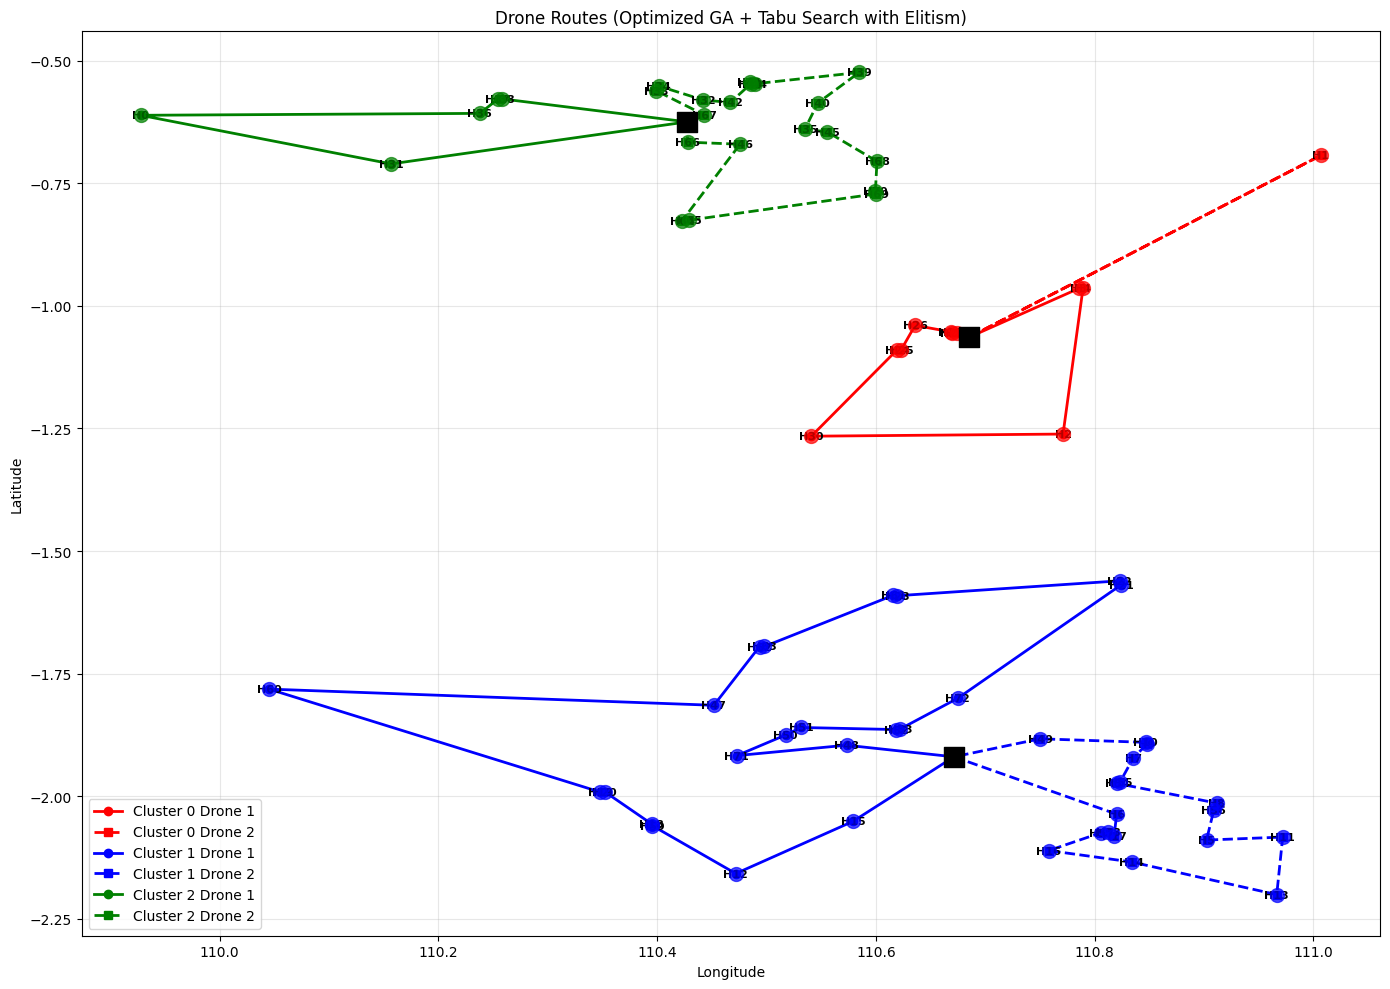

In [5]:
routing_hybrid = ClusterBasedDroneRoutingHybridTabuOptimized(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2},
    tabu_tenure=11,
    tabu_budget=82
)

routes = routing_hybrid.optimize_all_clusters(
    population_size=32,
    generations=140,
    mutation_rate=0.21799743834517937
)

routing_hybrid.print_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes(routes)

In [1]:
from ga_ts import *
road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}
routing_hybrid = ClusterBasedDroneRoutingHybridTabuOptimized(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2},
    tabu_tenure=11,
    tabu_budget=82
)

routes = routing_hybrid.optimize_all_clusters(
    population_size=32,
    generations=140,
    mutation_rate=0.21799743834517937
)

routing_hybrid.print_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes(routes)


=== DRONE ROUTES (Optimized Hybrid GA + Tabu Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: [0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0]
    Total distance: 108.70 km | Time: 60.39 min 
  Drone 2 Route: [0, 4, 0]
    Total distance: 109.19 km | Time: 60.66 min 

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: [1, 51, 55, 56, 75, 24, 25, 64, 26, 66, 65, 50, 54, 53, 74, 63, 22, 23, 21, 62, 15, 18, 1]
    Total distance: 282.65 km | Time: 157.03 min 
  Drone 2 Route: [1, 9, 20, 61, 60, 19, 17, 16, 14, 8, 59, 11, 57, 58, 10, 12, 13, 52, 1]
    Total distance: 130.28 km | Time: 72.38 min 

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: [2, 34, 3, 39, 40, 41, 2]
    Total distance: 117.41 km | Time: 65.23 min 
  Drone 2 Route: [2, 70, 36, 37, 35, 45, 46, 44, 47, 42, 43, 38, 48, 71, 73, 72, 68, 67, 49, 69, 2]
    Total distance: 117.02 km | Time: 65.01 min 
✅ Var

Hybrid GA + TS Version 2

=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 63, 22, 23, 74, 51, 55, 56, 75, 54, 53, 18, 15, 62, 21, 50, 65, 66, 64, 26, 25, 24, 1]
Cluster 1, Drone 2, Route: [1, 16, 14, 9, 57, 58, 11, 59, 8, 17, 19, 60, 61, 20, 10, 12, 13, 52, 1]
Cluster 2, Drone 1, Route: [2, 34, 3, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 67, 68, 69, 49, 72, 73, 71, 48, 38, 43, 47, 46, 44, 37, 36, 35, 70, 45, 42, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

=== DRONE ROUTES (Hybrid GA + Tabu Search) ===

Cluster 0 (Drones: 2):
  Drone 

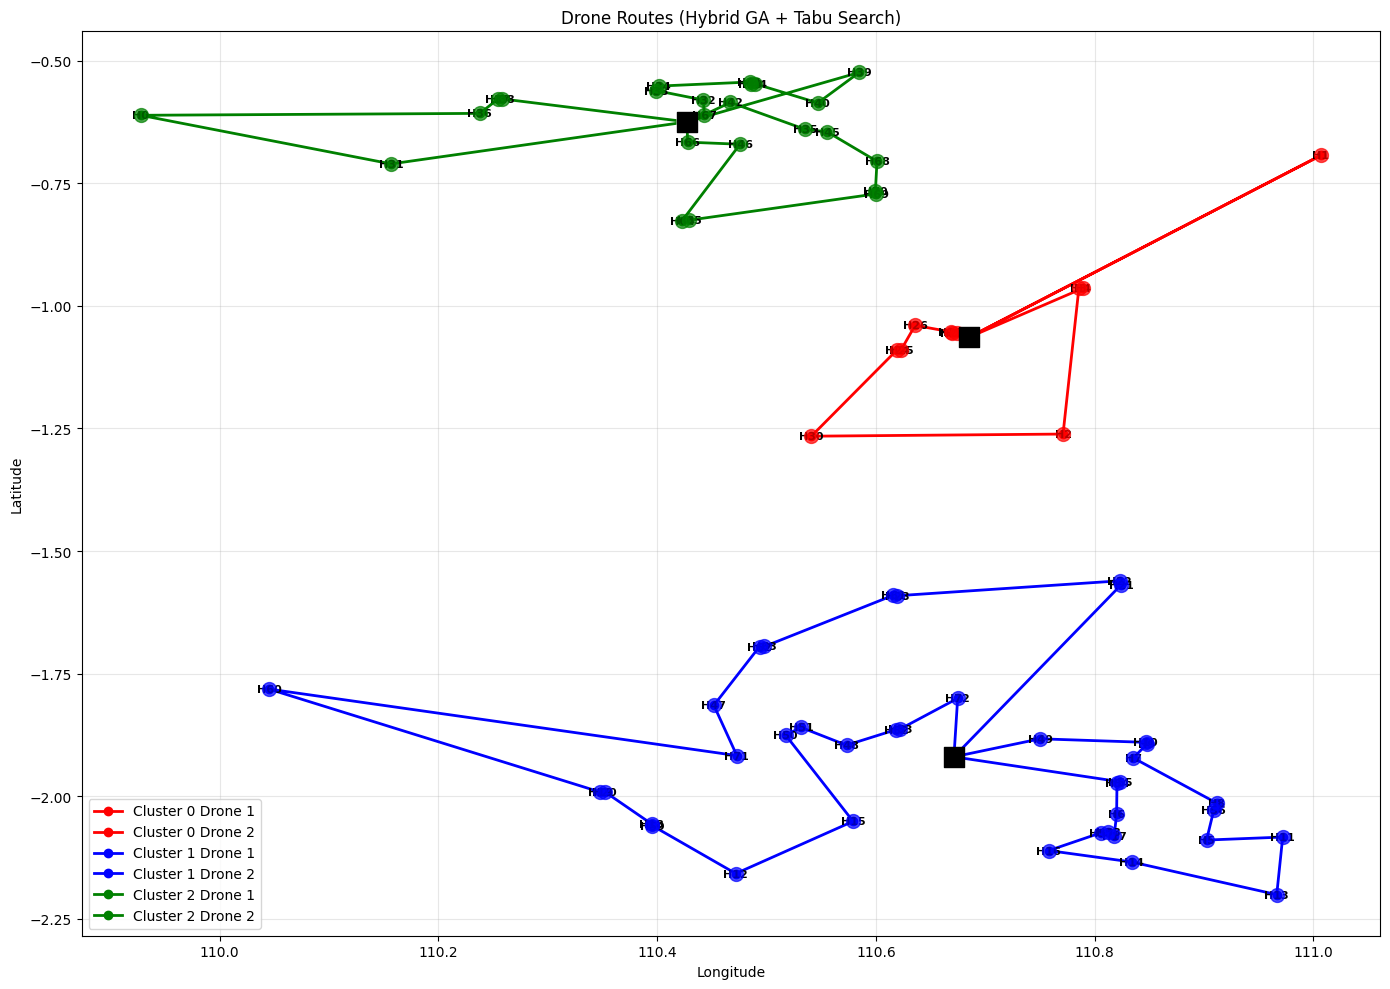

In [1]:
from ga_ts import *

road_points = {
    0: (-1.064124, 110.685258),
    1: (-1.919500, 110.671412),
    2: (-0.625036, 110.427354)
}

routing_hybrid = HybridGATabuDroneRouting(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

routes_hybrid = routing_hybrid.optimize_all_clusters_hybrid()
routing_hybrid.print_cluster_routes(routes_hybrid)
routing_hybrid.visualize_cluster_routes(routes_hybrid)


In [1]:
import optuna
from ga_ts import HybridGATabuDroneRouting
import warnings
warnings.filterwarnings("ignore")

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}
def objective(trial):
    # Parameter yang akan dioptimasi
    tabu_tenure = trial.suggest_int("tabu_tenure", 5, 30)
    max_iter = trial.suggest_int("max_iter", 50, 400)
    neighborhood_size = trial.suggest_int("neighborhood_size", 10, 200)

    # Buat objek hybrid dengan parameter trial
    routing_hybrid = HybridGATabuDroneRouting(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2},
        tabu_tenure=tabu_tenure,
        max_iter=max_iter,
        neighborhood_size=neighborhood_size
    )

    # Jalankan optimasi hybrid
    routes_hybrid = routing_hybrid.optimize_all_clusters_hybrid()

    # Hitung total jarak seluruh rute (objective function)
    total_distance = 0
    for cid, routes in routes_hybrid.items():
        for route in routes:
            for i in range(len(route)-1):
                total_distance += routing_hybrid.dist_matrix[route[i]][route[i+1]]

    return total_distance  # semakin kecil semakin baik


In [2]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)  # ubah 20 → 50 atau 100 untuk hasil lebih akurat

[I 2025-10-08 13:02:44,900] A new study created in memory with name: no-name-4c44dda7-55c8-42aa-a926-6819a13f0406


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 63, 22, 23, 21, 51, 55, 56, 65, 66, 64, 26, 24, 25, 75, 54, 53, 50, 74, 62, 15, 18, 1]
Cluster 1, Drone 2, Route: [1, 52, 58, 11, 59, 14, 8, 12, 13, 10, 57, 9, 20, 61, 60, 19, 17, 16, 1]
Cluster 2, Drone 1, Route: [2, 41, 40, 3, 34, 39, 2]
Cluster 2, Drone 2, Route: [2, 42, 47, 44, 46, 45, 35, 37, 36, 70, 69, 49, 38, 43, 48, 71, 73, 72, 68, 67, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:02:57,092] Trial 0 finished with value: 906.6018273440905 and parameters: {'tabu_tenure': 12, 'max_iter': 128, 'neighborhood_size': 191}. Best is trial 0 with value: 906.6018273440905.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 7, 6, 31, 30, 32, 29, 28, 27, 33, 5, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 63, 22, 23, 21, 62, 15, 18, 74, 53, 51, 55, 56, 75, 54, 50, 65, 66, 24, 25, 26, 64, 1]
Cluster 1, Drone 2, Route: [1, 52, 13, 12, 10, 11, 59, 14, 16, 8, 58, 57, 9, 60, 61, 20, 17, 19, 1]
Cluster 2, Drone 1, Route: [2, 3, 34, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 67, 68, 49, 69, 70, 35, 36, 37, 45, 43, 42, 44, 46, 47, 38, 48, 71, 73, 72, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:03:02,825] Trial 1 finished with value: 912.6853153290998 and parameters: {'tabu_tenure': 19, 'max_iter': 145, 'neighborhood_size': 36}. Best is trial 0 with value: 906.6018273440905.



--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...
=== Running Hybrid GA + Tabu Search Optimization ===


[I 2025-10-08 13:03:07,456] Trial 2 finished with value: 931.2206617505435 and parameters: {'tabu_tenure': 19, 'max_iter': 60, 'neighborhood_size': 31}. Best is trial 0 with value: 906.6018273440905.


Cluster 0, Drone 1, Route: [0, 33, 5, 7, 6, 31, 30, 32, 29, 28, 27, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 26, 64, 65, 66, 25, 24, 75, 56, 55, 53, 74, 62, 21, 23, 22, 63, 50, 54, 51, 18, 15, 1]
Cluster 1, Drone 2, Route: [1, 52, 13, 12, 10, 58, 57, 11, 59, 9, 20, 61, 60, 19, 17, 8, 14, 16, 1]
Cluster 2, Drone 1, Route: [2, 3, 34, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 44, 47, 46, 45, 35, 37, 36, 70, 69, 67, 68, 49, 43, 42, 38, 48, 71, 73, 72, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...
=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 7, 6, 5, 33, 27, 28, 29, 32, 30, 31, 0]
Cluster 0

[I 2025-10-08 13:03:13,197] Trial 3 finished with value: 902.1245070238947 and parameters: {'tabu_tenure': 20, 'max_iter': 273, 'neighborhood_size': 51}. Best is trial 3 with value: 902.1245070238947.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 25, 24, 74, 23, 22, 21, 62, 15, 18, 51, 55, 56, 54, 53, 65, 66, 64, 26, 75, 50, 63, 1]
Cluster 1, Drone 2, Route: [1, 19, 17, 20, 61, 60, 9, 52, 13, 12, 10, 58, 57, 11, 59, 8, 14, 16, 1]
Cluster 2, Drone 1, Route: [2, 41, 40, 39, 3, 34, 2]
Cluster 2, Drone 2, Route: [2, 67, 68, 38, 43, 42, 47, 44, 46, 45, 35, 70, 69, 49, 72, 73, 71, 48, 36, 37, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:03:18,919] Trial 4 finished with value: 935.0615306851322 and parameters: {'tabu_tenure': 19, 'max_iter': 102, 'neighborhood_size': 124}. Best is trial 3 with value: 902.1245070238947.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 7, 6, 31, 30, 32, 29, 28, 27, 33, 5, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 63, 22, 23, 21, 62, 15, 18, 74, 53, 24, 25, 26, 64, 75, 56, 55, 51, 54, 50, 65, 66, 1]
Cluster 1, Drone 2, Route: [1, 52, 13, 12, 10, 11, 59, 8, 58, 57, 9, 61, 20, 14, 16, 17, 60, 19, 1]
Cluster 2, Drone 1, Route: [2, 41, 40, 39, 3, 34, 2]
Cluster 2, Drone 2, Route: [2, 67, 68, 69, 46, 44, 47, 42, 43, 38, 48, 71, 73, 72, 49, 70, 45, 35, 36, 37, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:03:25,074] Trial 5 finished with value: 887.241004480781 and parameters: {'tabu_tenure': 17, 'max_iter': 223, 'neighborhood_size': 93}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 62, 15, 18, 56, 75, 64, 26, 25, 24, 66, 65, 50, 53, 54, 55, 51, 74, 21, 23, 22, 63, 1]
Cluster 1, Drone 2, Route: [1, 19, 60, 61, 20, 17, 16, 14, 8, 59, 11, 9, 57, 58, 10, 12, 13, 52, 1]
Cluster 2, Drone 1, Route: [2, 34, 3, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 42, 43, 47, 44, 46, 45, 70, 69, 67, 68, 72, 73, 71, 49, 36, 37, 35, 38, 48, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:03:31,752] Trial 6 finished with value: 898.7344775801575 and parameters: {'tabu_tenure': 22, 'max_iter': 300, 'neighborhood_size': 101}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 33, 27, 28, 29, 32, 30, 31, 6, 7, 5, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 55, 56, 64, 26, 25, 24, 75, 18, 15, 62, 21, 22, 23, 50, 65, 66, 54, 51, 53, 74, 63, 1]
Cluster 1, Drone 2, Route: [1, 52, 13, 12, 10, 58, 57, 9, 11, 59, 14, 16, 8, 17, 20, 61, 60, 19, 1]
Cluster 2, Drone 1, Route: [2, 41, 40, 39, 34, 3, 2]
Cluster 2, Drone 2, Route: [2, 42, 43, 49, 69, 70, 36, 37, 35, 45, 46, 44, 47, 38, 48, 71, 73, 72, 68, 67, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:03:37,434] Trial 7 finished with value: 912.8432974091724 and parameters: {'tabu_tenure': 6, 'max_iter': 142, 'neighborhood_size': 128}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 63, 65, 66, 62, 21, 22, 23, 74, 50, 54, 53, 15, 18, 51, 55, 56, 75, 64, 26, 25, 24, 1]
Cluster 1, Drone 2, Route: [1, 52, 13, 12, 10, 58, 57, 9, 20, 61, 60, 19, 17, 8, 59, 11, 14, 16, 1]
Cluster 2, Drone 1, Route: [2, 34, 3, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 67, 68, 72, 73, 71, 49, 69, 70, 36, 37, 35, 45, 46, 44, 47, 42, 43, 38, 48, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:03:42,483] Trial 8 finished with value: 910.5236839706387 and parameters: {'tabu_tenure': 24, 'max_iter': 86, 'neighborhood_size': 114}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 7, 6, 31, 30, 32, 29, 28, 27, 33, 5, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 25, 24, 75, 56, 55, 18, 15, 62, 21, 22, 23, 51, 54, 53, 74, 50, 65, 66, 26, 64, 63, 1]
Cluster 1, Drone 2, Route: [1, 52, 8, 14, 16, 17, 19, 60, 61, 20, 9, 59, 11, 57, 58, 10, 12, 13, 1]
Cluster 2, Drone 1, Route: [2, 3, 34, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 67, 68, 72, 73, 71, 48, 43, 38, 49, 69, 70, 36, 37, 35, 45, 46, 44, 47, 42, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:03:50,009] Trial 9 finished with value: 920.1832644675275 and parameters: {'tabu_tenure': 15, 'max_iter': 320, 'neighborhood_size': 180}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 24, 25, 26, 64, 65, 66, 75, 56, 55, 51, 54, 53, 74, 18, 15, 62, 21, 22, 23, 50, 63, 1]
Cluster 1, Drone 2, Route: [1, 13, 12, 10, 58, 57, 11, 59, 8, 14, 16, 17, 19, 60, 61, 20, 9, 52, 1]
Cluster 2, Drone 1, Route: [2, 41, 40, 3, 34, 39, 2]
Cluster 2, Drone 2, Route: [2, 38, 48, 71, 73, 72, 68, 67, 49, 69, 70, 45, 43, 42, 47, 44, 46, 35, 36, 37, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:03:55,588] Trial 10 finished with value: 890.2434975544912 and parameters: {'tabu_tenure': 28, 'max_iter': 215, 'neighborhood_size': 78}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 7, 6, 31, 30, 32, 29, 28, 27, 33, 5, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 63, 23, 22, 62, 21, 74, 53, 54, 50, 65, 66, 64, 26, 25, 24, 75, 56, 55, 51, 18, 15, 1]
Cluster 1, Drone 2, Route: [1, 19, 60, 61, 20, 8, 59, 11, 14, 16, 17, 9, 57, 58, 10, 12, 13, 52, 1]
Cluster 2, Drone 1, Route: [2, 39, 34, 3, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 48, 38, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 69, 49, 71, 73, 72, 68, 67, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:04:01,126] Trial 11 finished with value: 896.4204085587015 and parameters: {'tabu_tenure': 28, 'max_iter': 218, 'neighborhood_size': 77}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 18, 15, 62, 21, 22, 23, 74, 51, 55, 56, 75, 54, 53, 50, 64, 26, 25, 24, 66, 65, 63, 1]
Cluster 1, Drone 2, Route: [1, 17, 61, 9, 57, 52, 13, 12, 10, 58, 11, 59, 14, 16, 8, 20, 60, 19, 1]
Cluster 2, Drone 1, Route: [2, 3, 34, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 42, 43, 49, 69, 70, 45, 35, 36, 37, 44, 46, 47, 38, 48, 71, 73, 72, 68, 67, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:04:07,569] Trial 12 finished with value: 894.8646036356482 and parameters: {'tabu_tenure': 30, 'max_iter': 383, 'neighborhood_size': 74}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===


[I 2025-10-08 13:04:12,246] Trial 13 finished with value: 907.16288946584 and parameters: {'tabu_tenure': 13, 'max_iter': 210, 'neighborhood_size': 11}. Best is trial 5 with value: 887.241004480781.


Cluster 0, Drone 1, Route: [0, 33, 5, 31, 30, 32, 28, 27, 29, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 25, 24, 66, 65, 50, 54, 53, 74, 63, 22, 23, 21, 62, 15, 18, 51, 55, 56, 75, 26, 64, 1]
Cluster 1, Drone 2, Route: [1, 16, 14, 8, 17, 19, 60, 61, 20, 9, 59, 11, 12, 13, 10, 58, 57, 52, 1]
Cluster 2, Drone 1, Route: [2, 34, 3, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 44, 46, 47, 42, 43, 38, 48, 71, 73, 72, 68, 67, 49, 69, 70, 36, 37, 35, 45, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...
=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0

[I 2025-10-08 13:04:18,334] Trial 14 finished with value: 907.4335810078007 and parameters: {'tabu_tenure': 25, 'max_iter': 181, 'neighborhood_size': 156}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 21, 62, 15, 18, 74, 50, 65, 66, 64, 26, 54, 51, 55, 56, 75, 24, 25, 53, 23, 22, 63, 1]
Cluster 1, Drone 2, Route: [1, 9, 57, 58, 52, 13, 12, 10, 11, 59, 14, 8, 20, 61, 60, 19, 17, 16, 1]
Cluster 2, Drone 1, Route: [2, 39, 34, 3, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 67, 68, 72, 73, 71, 48, 38, 43, 42, 47, 46, 44, 37, 36, 69, 49, 70, 35, 45, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:04:24,203] Trial 15 finished with value: 928.5935919452163 and parameters: {'tabu_tenure': 8, 'max_iter': 254, 'neighborhood_size': 85}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 6, 7, 5, 33, 30, 31, 32, 29, 28, 27, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 63, 65, 66, 50, 53, 54, 51, 74, 23, 22, 18, 55, 56, 75, 24, 25, 26, 64, 21, 62, 15, 1]
Cluster 1, Drone 2, Route: [1, 19, 17, 20, 61, 60, 9, 57, 10, 12, 13, 52, 58, 11, 59, 8, 16, 14, 1]
Cluster 2, Drone 1, Route: [2, 39, 34, 3, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 37, 36, 35, 45, 46, 44, 47, 42, 43, 48, 38, 67, 68, 72, 73, 71, 49, 69, 70, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:04:30,573] Trial 16 finished with value: 909.454284964008 and parameters: {'tabu_tenure': 16, 'max_iter': 182, 'neighborhood_size': 148}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 7, 6, 31, 30, 32, 29, 28, 27, 33, 5, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 24, 25, 26, 64, 50, 22, 23, 21, 62, 15, 18, 74, 53, 54, 51, 55, 56, 75, 66, 65, 63, 1]
Cluster 1, Drone 2, Route: [1, 11, 59, 20, 61, 60, 19, 17, 16, 14, 8, 9, 57, 58, 10, 12, 13, 52, 1]
Cluster 2, Drone 1, Route: [2, 3, 34, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 42, 47, 46, 44, 37, 36, 35, 38, 72, 73, 71, 48, 43, 45, 70, 69, 49, 68, 67, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:04:36,777] Trial 17 finished with value: 900.9635086444231 and parameters: {'tabu_tenure': 11, 'max_iter': 347, 'neighborhood_size': 59}. Best is trial 5 with value: 887.241004480781.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 31, 30, 32, 28, 27, 29, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 64, 26, 25, 24, 75, 56, 55, 51, 74, 63, 22, 23, 21, 62, 15, 18, 53, 54, 50, 65, 66, 1]
Cluster 1, Drone 2, Route: [1, 8, 59, 11, 9, 20, 61, 60, 19, 17, 16, 14, 12, 13, 10, 58, 57, 52, 1]
Cluster 2, Drone 1, Route: [2, 41, 40, 39, 34, 3, 2]
Cluster 2, Drone 2, Route: [2, 67, 68, 69, 49, 72, 73, 71, 48, 38, 43, 42, 47, 46, 44, 37, 36, 35, 45, 70, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:04:42,746] Trial 18 finished with value: 878.594308978288 and parameters: {'tabu_tenure': 26, 'max_iter': 265, 'neighborhood_size': 90}. Best is trial 18 with value: 878.594308978288.


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 55, 56, 75, 24, 25, 26, 64, 66, 65, 54, 51, 53, 74, 50, 63, 22, 23, 21, 62, 15, 18, 1]
Cluster 1, Drone 2, Route: [1, 52, 13, 12, 10, 58, 57, 9, 11, 59, 8, 14, 16, 17, 20, 61, 60, 19, 1]
Cluster 2, Drone 1, Route: [2, 39, 34, 3, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 67, 68, 38, 48, 71, 73, 72, 49, 69, 70, 46, 44, 47, 42, 43, 45, 35, 36, 37, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...


[I 2025-10-08 13:04:49,136] Trial 19 finished with value: 870.6253483632224 and parameters: {'tabu_tenure': 25, 'max_iter': 264, 'neighborhood_size': 105}. Best is trial 19 with value: 870.6253483632224.


In [5]:
print("Best params:", study.best_params)
print("Best total distance:", study.best_value)

Best params: {'tabu_tenure': 25, 'max_iter': 264, 'neighborhood_size': 105}
Best total distance: 870.6253483632224


=== Running Hybrid GA + Tabu Search Optimization ===
Cluster 0, Drone 1, Route: [0, 5, 33, 27, 28, 29, 32, 30, 31, 6, 7, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 18, 15, 62, 21, 74, 51, 55, 56, 54, 50, 65, 66, 24, 25, 26, 64, 75, 53, 23, 22, 63, 1]
Cluster 1, Drone 2, Route: [1, 19, 60, 61, 20, 17, 8, 9, 57, 58, 10, 52, 13, 12, 11, 59, 14, 16, 1]
Cluster 2, Drone 1, Route: [2, 41, 40, 39, 3, 34, 2]
Cluster 2, Drone 2, Route: [2, 44, 46, 47, 42, 43, 45, 35, 37, 36, 70, 69, 67, 68, 49, 38, 48, 71, 73, 72, 2]

--- Refining Cluster 0 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 1 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

--- Refining Cluster 2 ---
  Drone 1: Refining GA route with Tabu Search...
  Drone 2: Refining GA route with Tabu Search...

=== DRONE ROUTES (Hybrid GA + Tabu Search) ===

Cluster 0 (Drones: 2):
  Drone 

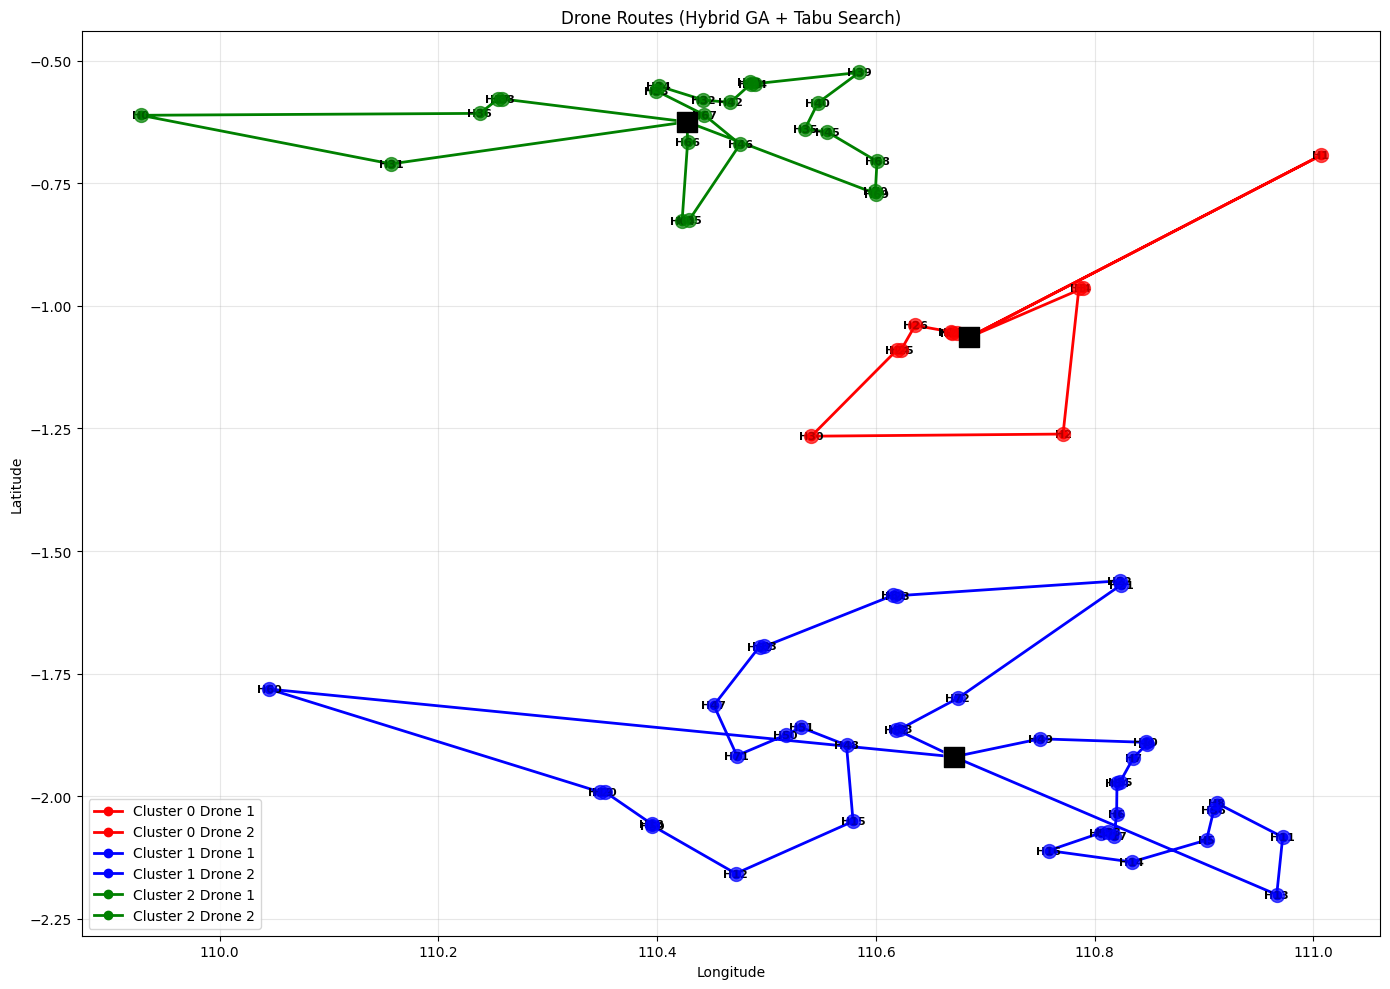

In [6]:
best_params = study.best_params

routing_best = HybridGATabuDroneRouting(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2},
    tabu_tenure=best_params["tabu_tenure"],
    max_iter=best_params["max_iter"],
    neighborhood_size=best_params["neighborhood_size"]
)

routes_best = routing_best.optimize_all_clusters_hybrid()
routing_best.print_cluster_routes(routes_best)
routing_best.visualize_cluster_routes(routes_best)

Hybrid GA+TS Dataset Melawi

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

=== DRONE ROUTES (Hybrid GA + Tabu Search, Melawi) ===

Cluster 1 (Drones: 2):
  Start from depot: (-0.40901, 112.19583)
  Drone 1 Route: [0, 52, 10, 54, 14, 13, 55, 0]
    Total distance: 59.13 km | Time: 32.85 min 
  Drone 2 Route: [0, 15, 11, 56, 12, 38, 0]
    Total distance: 44.51 km | Time: 24.73 min 

Cluster 2 (Drones: 2):
  Start from depot: (-0.59270, 111.58594)
  Drone 1 Route: [1, 80, 79, 78, 77, 28, 75, 74, 27, 26, 72, 73, 76, 44, 45, 43, 1]
    Total distance: 62.89 km | Time: 34.94 min 
  Drone 2 Route: [1, 69, 40, 68, 70, 23, 24, 25, 71, 42, 22, 64, 66, 67, 65, 21, 1]
    Total distance: 90.48 km | Time: 50.27 min 

Cluster 3 (Drones: 2):
  Start from depot: (-0.34309, 111.75026)
  Drone 1 Route: [2, 6, 7, 8, 4, 5, 2]
    Total distance: 48.07 km | Time: 26.71 min 
  Drone 2 Route: [2, 19, 59, 20, 60, 58, 2]
    Total distance: 52.92 km | Time: 29.40 min 

Cluster 4 (Drones: 2):
  Start from d

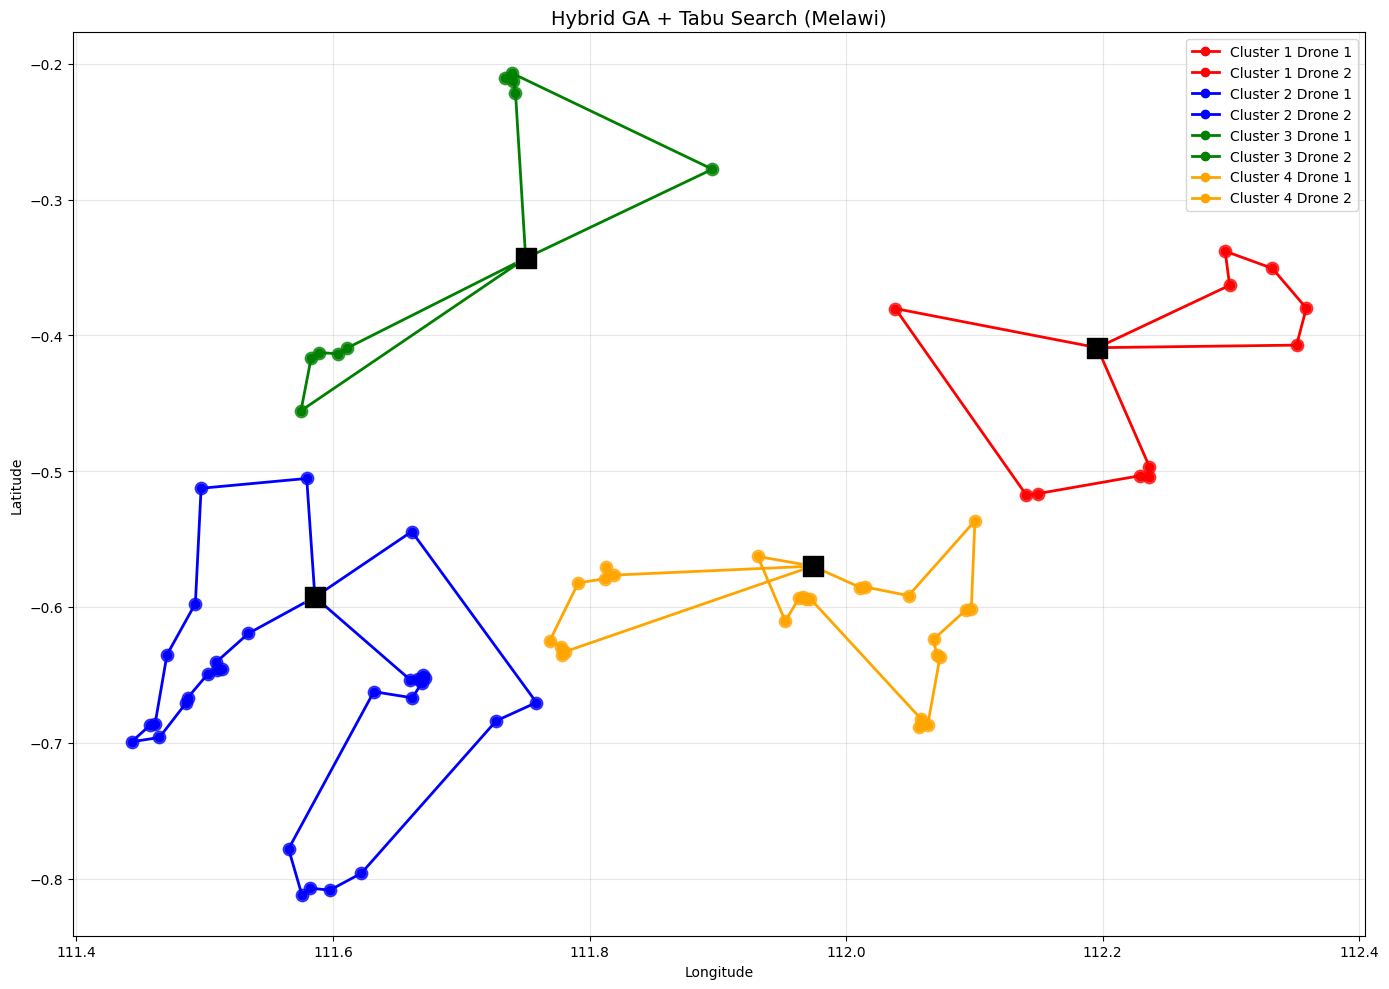

In [2]:
from ga_ts import *
road_points = {
    0: (-0.409011175, 112.1958254),
    1: (-0.592699463, 111.5859392),
    2: (-0.343085986, 111.7502586),
    3: (-0.569912205, 111.9740824)
}

n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

hybrid_ts_melawi = ClusterBasedDroneRoutingHybridTabuMelawi(
    csv_file="hotspot_clustered.csv",
    road_points=road_points,
    n_drones=n_drones,
)

routes_hybrid = hybrid_ts_melawi.optimize_all_clusters()

hybrid_ts_melawi.print_cluster_routes(routes_hybrid)
hybrid_ts_melawi.visualize_cluster_routes(routes_hybrid)

In [1]:
from ga_ts import *
road_points = {
    0: (-0.409011175, 112.1958254),
    1: (-0.592699463, 111.5859392),
    2: (-0.343085986, 111.7502586),
    3: (-0.569912205, 111.9740824)
}

n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

hybrid_ts_melawi = ClusterBasedDroneRoutingHybridTabuMelawi(
    csv_file="hotspot_clustered.csv",
    road_points=road_points,
    n_drones=n_drones,
)

routes_hybrid = hybrid_ts_melawi.optimize_all_clusters()

hybrid_ts_melawi.print_cluster_routes(routes_hybrid)
hybrid_ts_melawi.visualize_cluster_routes(routes_hybrid)

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

=== DRONE ROUTES (Hybrid GA + Tabu Search, Melawi) ===

Cluster 1 (Drones: 2):
  Start from depot: (-0.40901, 112.19583)
  Drone 1 Route: [0, 55, 13, 14, 54, 10, 52, 0]
    Total distance: 59.13 km | Time: 32.85 min 
  Drone 2 Route: [0, 15, 11, 56, 12, 38, 0]
    Total distance: 44.51 km | Time: 24.73 min 

Cluster 2 (Drones: 2):
  Start from depot: (-0.59270, 111.58594)
  Drone 1 Route: [1, 80, 79, 78, 77, 28, 75, 74, 27, 26, 72, 73, 76, 44, 45, 43, 1]
    Total distance: 62.89 km | Time: 34.94 min 
  Drone 2 Route: [1, 71, 25, 24, 23, 70, 42, 22, 21, 65, 67, 66, 64, 68, 40, 69, 1]
    Total distance: 90.65 km | Time: 50.36 min 

Cluster 3 (Drones: 2):
  Start from depot: (-0.34309, 111.75026)
  Drone 1 Route: [2, 6, 7, 8, 4, 5, 2]
    Total distance: 48.07 km | Time: 26.71 min 
  Drone 2 Route: [2, 19, 59, 20, 60, 58, 2]
    Total distance: 52.92 km | Time: 29.40 min 

Cluster 4 (Drones: 2):
  Start from d

Tuning Melawi

In [3]:
import optuna
import warnings
warnings.filterwarnings("ignore")

# === Titik depot (Melawi) ===
road_points = {
    0: (-0.409011175, 112.1958254),   # Cluster 1
    1: (-0.592699463, 111.5859392),   # Cluster 2
    2: (-0.343085986, 111.7502586),   # Cluster 3 (Depo Utama BPBD)
    3: (-0.569912205, 111.9740824)    # Cluster 4
}

# === Fungsi objektif untuk Optuna ===
def objective_melawi(trial):
    # Parameter GA + Tabu yang akan dituning
    pop = trial.suggest_int("population_size", 20, 40)
    gen = trial.suggest_int("generations", 80, 150)
    mut = trial.suggest_float("mutation_rate", 0.1, 0.25)
    tt = trial.suggest_int("tabu_tenure", 5, 20)
    tb = trial.suggest_int("tabu_budget", 50, 120)

    # Inisialisasi class untuk Melawi
    routing = ClusterBasedDroneRoutingHybridTabuMelawi(
        csv_file="hotspot_clustered.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2, 3: 2},  # Semua cluster 2 drone
        tabu_tenure=tt,
        tabu_budget=tb
    )

    # Jalankan optimasi
    routes = routing.optimize_all_clusters(
        population_size=pop,
        generations=gen,
        mutation_rate=mut
    )

    # Hitung total distance dari semua cluster (km)
    total_distance = 0
    for cid, routes_list in routes.items():
        for route in routes_list:
            for i in range(len(route)-1):
                total_distance += routing.dist_matrix[route[i]][route[i+1]]

    print(f"Trial {trial.number}: pop={pop}, gen={gen}, mut={mut:.2f}, TT={tt}, TB={tb} → Dist={total_distance:.2f}")
    return total_distance


# === Jalankan Optuna Study ===
study_melawi = optuna.create_study(direction="minimize", study_name="melawi_hybrid_ga_tabu")
study_melawi.optimize(objective_melawi, n_trials=20)

# === Hasil terbaik ===
print("\n=== 🏆 Best Configuration (Melawi Hybrid GA + Tabu) ===")
print(f"Best params: {study_melawi.best_params}")
print(f"Best total distance: {study_melawi.best_value:.2f} km")


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-12 15:40:20,957] A new study created in memory with name: melawi_hybrid_ga_tabu


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 15:41:54,120] Trial 0 finished with value: 474.7614846128477 and parameters: {'population_size': 36, 'generations': 80, 'mutation_rate': 0.15493552091696713, 'tabu_tenure': 14, 'tabu_budget': 50}. Best is trial 0 with value: 474.7614846128477.


Trial 0: pop=36, gen=80, mut=0.15, TT=14, TB=50 → Dist=474.76
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 15:44:54,011] Trial 1 finished with value: 474.4026481059254 and parameters: {'population_size': 26, 'generations': 116, 'mutation_rate': 0.17438163424921083, 'tabu_tenure': 9, 'tabu_budget': 92}. Best is trial 1 with value: 474.4026481059254.


Trial 1: pop=26, gen=116, mut=0.17, TT=9, TB=92 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 15:47:28,196] Trial 2 finished with value: 474.4708474132659 and parameters: {'population_size': 35, 'generations': 97, 'mutation_rate': 0.23204820360416933, 'tabu_tenure': 14, 'tabu_budget': 79}. Best is trial 1 with value: 474.4026481059254.


Trial 2: pop=35, gen=97, mut=0.23, TT=14, TB=79 → Dist=474.47
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 15:49:58,678] Trial 3 finished with value: 474.4808911844747 and parameters: {'population_size': 25, 'generations': 119, 'mutation_rate': 0.24228051625373268, 'tabu_tenure': 18, 'tabu_budget': 104}. Best is trial 1 with value: 474.4026481059254.


Trial 3: pop=25, gen=119, mut=0.24, TT=18, TB=104 → Dist=474.48
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 15:54:31,441] Trial 4 finished with value: 474.4026481059254 and parameters: {'population_size': 32, 'generations': 129, 'mutation_rate': 0.1116378691419466, 'tabu_tenure': 6, 'tabu_budget': 111}. Best is trial 1 with value: 474.4026481059254.


Trial 4: pop=32, gen=129, mut=0.11, TT=6, TB=111 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 15:58:41,402] Trial 5 finished with value: 474.4808911844747 and parameters: {'population_size': 31, 'generations': 142, 'mutation_rate': 0.19735609154348827, 'tabu_tenure': 5, 'tabu_budget': 98}. Best is trial 1 with value: 474.4026481059254.


Trial 5: pop=31, gen=142, mut=0.20, TT=5, TB=98 → Dist=474.48
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:02:32,402] Trial 6 finished with value: 474.5831770273415 and parameters: {'population_size': 30, 'generations': 147, 'mutation_rate': 0.1541201126245021, 'tabu_tenure': 5, 'tabu_budget': 93}. Best is trial 1 with value: 474.4026481059254.


Trial 6: pop=30, gen=147, mut=0.15, TT=5, TB=93 → Dist=474.58
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:05:09,964] Trial 7 finished with value: 474.84033056881407 and parameters: {'population_size': 27, 'generations': 120, 'mutation_rate': 0.20480050509342834, 'tabu_tenure': 10, 'tabu_budget': 85}. Best is trial 1 with value: 474.4026481059254.


Trial 7: pop=27, gen=120, mut=0.20, TT=10, TB=85 → Dist=474.84
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:08:47,778] Trial 8 finished with value: 474.4026481059254 and parameters: {'population_size': 37, 'generations': 137, 'mutation_rate': 0.15500055932060958, 'tabu_tenure': 6, 'tabu_budget': 68}. Best is trial 1 with value: 474.4026481059254.


Trial 8: pop=37, gen=137, mut=0.16, TT=6, TB=68 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:10:17,586] Trial 9 finished with value: 474.4026481059254 and parameters: {'population_size': 26, 'generations': 128, 'mutation_rate': 0.19450513201140784, 'tabu_tenure': 19, 'tabu_budget': 52}. Best is trial 1 with value: 474.4026481059254.


Trial 9: pop=26, gen=128, mut=0.19, TT=19, TB=52 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:12:52,160] Trial 10 finished with value: 475.62911731906496 and parameters: {'population_size': 21, 'generations': 103, 'mutation_rate': 0.1039004662705365, 'tabu_tenure': 10, 'tabu_budget': 119}. Best is trial 1 with value: 474.4026481059254.


Trial 10: pop=21, gen=103, mut=0.10, TT=10, TB=119 → Dist=475.63
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:16:51,915] Trial 11 finished with value: 474.4708474132659 and parameters: {'population_size': 32, 'generations': 107, 'mutation_rate': 0.11638361294598776, 'tabu_tenure': 9, 'tabu_budget': 115}. Best is trial 1 with value: 474.4026481059254.


Trial 11: pop=32, gen=107, mut=0.12, TT=9, TB=115 → Dist=474.47
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:19:44,671] Trial 12 finished with value: 474.4808911844747 and parameters: {'population_size': 21, 'generations': 128, 'mutation_rate': 0.13301301359703893, 'tabu_tenure': 8, 'tabu_budget': 108}. Best is trial 1 with value: 474.4026481059254.


Trial 12: pop=21, gen=128, mut=0.13, TT=8, TB=108 → Dist=474.48
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:22:23,733] Trial 13 finished with value: 474.7614846128477 and parameters: {'population_size': 28, 'generations': 131, 'mutation_rate': 0.13060868397766953, 'tabu_tenure': 12, 'tabu_budget': 75}. Best is trial 1 with value: 474.4026481059254.


Trial 13: pop=28, gen=131, mut=0.13, TT=12, TB=75 → Dist=474.76
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:26:25,497] Trial 14 finished with value: 474.4026481059254 and parameters: {'population_size': 39, 'generations': 111, 'mutation_rate': 0.17976342765208495, 'tabu_tenure': 7, 'tabu_budget': 93}. Best is trial 1 with value: 474.4026481059254.


Trial 14: pop=39, gen=111, mut=0.18, TT=7, TB=93 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:28:38,391] Trial 15 finished with value: 474.4808911844747 and parameters: {'population_size': 24, 'generations': 91, 'mutation_rate': 0.2174055474130264, 'tabu_tenure': 12, 'tabu_budget': 109}. Best is trial 1 with value: 474.4026481059254.


Trial 15: pop=24, gen=91, mut=0.22, TT=12, TB=109 → Dist=474.48
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:32:26,935] Trial 16 finished with value: 474.4026481059254 and parameters: {'population_size': 34, 'generations': 118, 'mutation_rate': 0.1719410704767319, 'tabu_tenure': 8, 'tabu_budget': 100}. Best is trial 1 with value: 474.4026481059254.


Trial 16: pop=34, gen=118, mut=0.17, TT=8, TB=100 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:34:46,422] Trial 17 finished with value: 474.4808911844747 and parameters: {'population_size': 29, 'generations': 133, 'mutation_rate': 0.12897295358941244, 'tabu_tenure': 11, 'tabu_budget': 65}. Best is trial 1 with value: 474.4026481059254.


Trial 17: pop=29, gen=133, mut=0.13, TT=11, TB=65 → Dist=474.48
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:37:13,534] Trial 18 finished with value: 474.4026481059254 and parameters: {'population_size': 23, 'generations': 150, 'mutation_rate': 0.10877468301160614, 'tabu_tenure': 16, 'tabu_budget': 88}. Best is trial 1 with value: 474.4026481059254.


Trial 18: pop=23, gen=150, mut=0.11, TT=16, TB=88 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-12 16:41:27,021] Trial 19 finished with value: 474.56716701353014 and parameters: {'population_size': 33, 'generations': 124, 'mutation_rate': 0.1729692581708477, 'tabu_tenure': 7, 'tabu_budget': 112}. Best is trial 1 with value: 474.4026481059254.


Trial 19: pop=33, gen=124, mut=0.17, TT=7, TB=112 → Dist=474.57

=== 🏆 Best Configuration (Melawi Hybrid GA + Tabu) ===
Best params: {'population_size': 26, 'generations': 116, 'mutation_rate': 0.17438163424921083, 'tabu_tenure': 9, 'tabu_budget': 92}
Best total distance: 474.40 km


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

=== DRONE ROUTES (Hybrid GA + Tabu Search, Melawi) ===

Cluster 1 (Drones: 2):
  Start from depot: (-0.40901, 112.19583)
  Drone 1 Route: [0, 52, 10, 54, 14, 13, 55, 0]
    Total distance: 59.13 km | Time: 32.85 min 
  Drone 2 Route: [0, 15, 11, 56, 12, 38, 0]
    Total distance: 44.51 km | Time: 24.73 min 

Cluster 2 (Drones: 2):
  Start from depot: (-0.59270, 111.58594)
  Drone 1 Route: [1, 80, 79, 78, 77, 28, 75, 74, 27, 26, 72, 73, 76, 44, 45, 43, 1]
    Total distance: 62.89 km | Time: 34.94 min 
  Drone 2 Route: [1, 42, 71, 25, 24, 23, 70, 68, 40, 22, 21, 65, 64, 66, 67, 69, 1]
    Total distance: 90.56 km | Time: 50.31 min 

Cluster 3 (Drones: 2):
  Start from depot: (-0.34309, 111.75026)
  Drone 1 Route: [2, 5, 4, 8, 7, 6, 2]
    Total distance: 48.07 km | Time: 26.71 min 
  Drone 2 Route: [2, 19, 59, 20, 60, 58, 2]
    Total distance: 52.92 km | Time: 29.40 min 

Cluster 4 (Drones: 2):
  Start from d

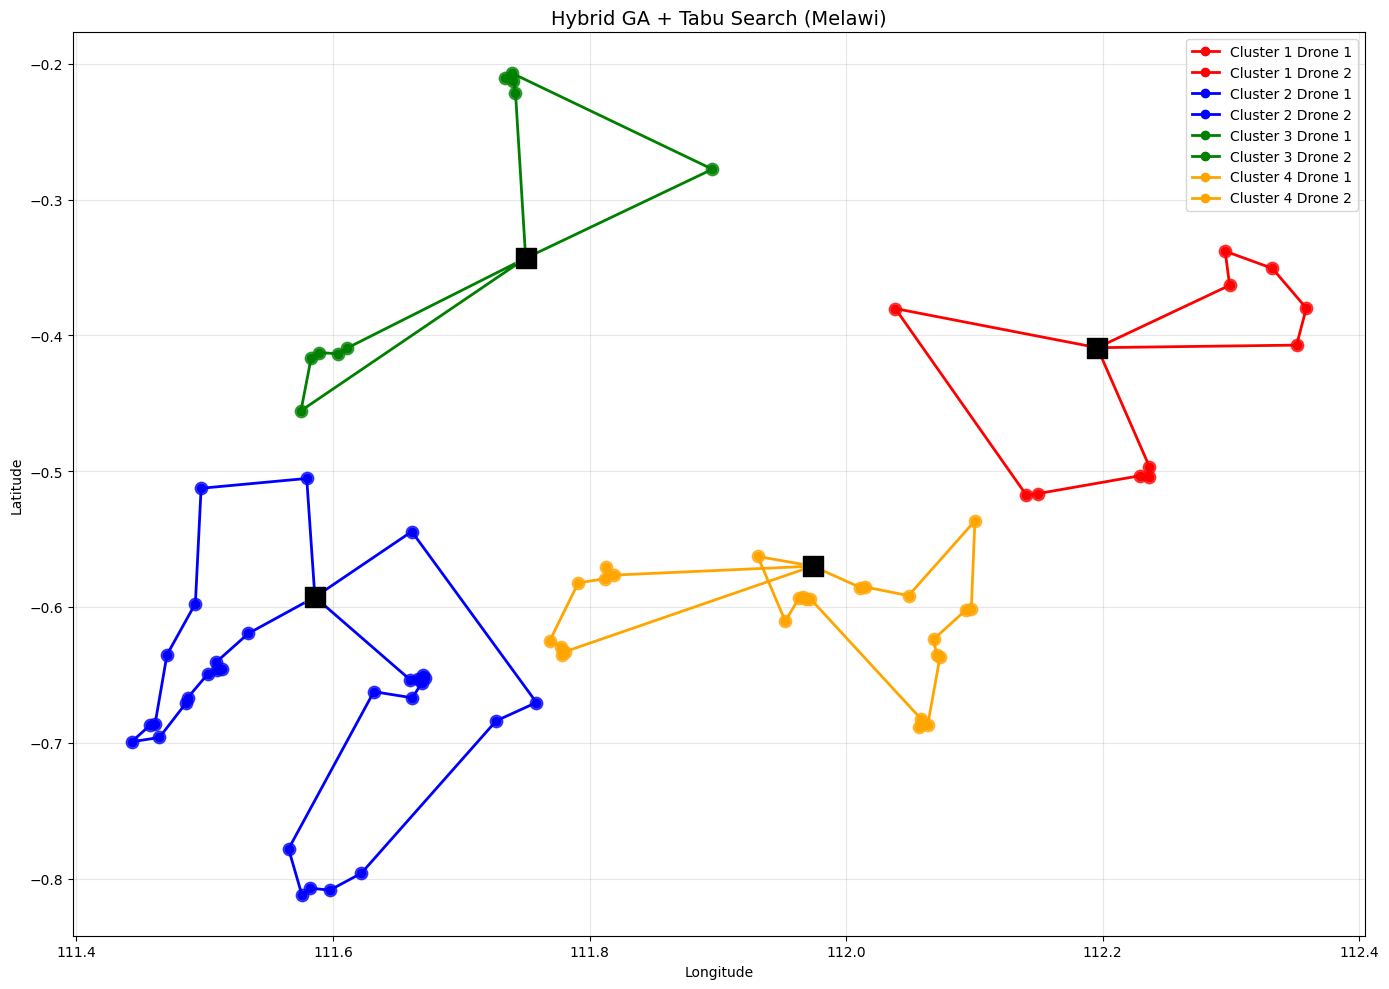

In [6]:
best_params = study_melawi.best_params

routing_best = ClusterBasedDroneRoutingHybridTabuMelawi(
    csv_file="hotspot_clustered.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2, 3: 2},
    tabu_tenure=9,
    tabu_budget=92
)

routes_best = routing_best.optimize_all_clusters(
    population_size=26,
    generations=116,
    mutation_rate=0.17438163424921083
)

routing_best.print_cluster_routes(routes_best)
hybrid_ts_melawi.visualize_cluster_routes(routes_hybrid)


In [3]:
routing_best = ClusterBasedDroneRoutingHybridTabuMelawi(
    csv_file="hotspot_clustered.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2, 3: 2},
    tabu_tenure=9,
    tabu_budget=92
)

routes_best = routing_best.optimize_all_clusters(
    population_size=26,
    generations=116,
    mutation_rate=0.17438163424921083
)

routing_best.print_cluster_routes(routes_best)
hybrid_ts_melawi.visualize_cluster_routes(routes_hybrid)


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

=== DRONE ROUTES (Hybrid GA + Tabu Search, Melawi) ===

Cluster 1 (Drones: 2):
  Start from depot: (-0.40901, 112.19583)
  Drone 1 Route: [0, 52, 10, 54, 14, 13, 55, 0]
    Total distance: 59.13 km | Time: 32.85 min 
  Drone 2 Route: [0, 38, 12, 56, 11, 15, 0]
    Total distance: 44.51 km | Time: 24.73 min 

Cluster 2 (Drones: 2):
  Start from depot: (-0.59270, 111.58594)
  Drone 1 Route: [1, 80, 79, 78, 77, 28, 75, 74, 27, 26, 72, 73, 76, 44, 45, 43, 1]
    Total distance: 62.89 km | Time: 34.94 min 
  Drone 2 Route: [1, 69, 40, 68, 64, 66, 67, 65, 21, 22, 42, 70, 23, 24, 25, 71, 1]
    Total distance: 90.65 km | Time: 50.36 min 

Cluster 3 (Drones: 2):
  Start from depot: (-0.34309, 111.75026)
  Drone 1 Route: [2, 5, 4, 8, 7, 6, 2]
    Total distance: 48.07 km | Time: 26.71 min 
  Drone 2 Route: [2, 19, 59, 20, 60, 58, 2]
    Total distance: 52.92 km | Time: 29.40 min 

Cluster 4 (Drones: 2):
  Start from d